# PyTorch Workflow
Let's explore a an example PyTorch end-to-end workflow.
Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Check pyTorch version
print(torch.__version__)

2.7.0+cpu


## 1. Data (preparing and loading)
Data can be almost anything... in machine learning.
* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

In [3]:
# Creare Known Parameters
weight = 0.7
bias = 0.3
# Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias # linear regression formula y = mx+c
print(f"X[:10]  :   {X[:10]}","\n")
print(f"Y[:10]  :   {Y[:10]}","\n")
print(f"len(X) :   {len(X)}")
print(f"len(Y) :   {len(Y)}")



X[:10]  :   tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 

Y[:10]  :   tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 

len(X) :   50
len(Y) :   50


In [4]:
y = weight * X + bias
print(f"y = {weight}x + {bias} = {y}")

y = 0.7x + 0.3 = tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


### Splitting data into training and test sets (60% - 80% train, 10% - 20% test)

Let's create a training and test data to use for our model.

In [5]:
print(f"len(X) = {len(X)} , len(y) = {len(y)}")

len(X) = 50 , len(y) = 50


In [6]:
# create a train and test set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f"train_split: {train_split}")
print(f"x_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"x_test: {len(X_test)}, y_test: {len(y_test)}")

train_split: 40
x_train: 40, y_train: 40
x_test: 10, y_test: 10


### How might we better visualize the data?
This is where the data exporer's motto come in.
"Visualization is the soul of understanding."

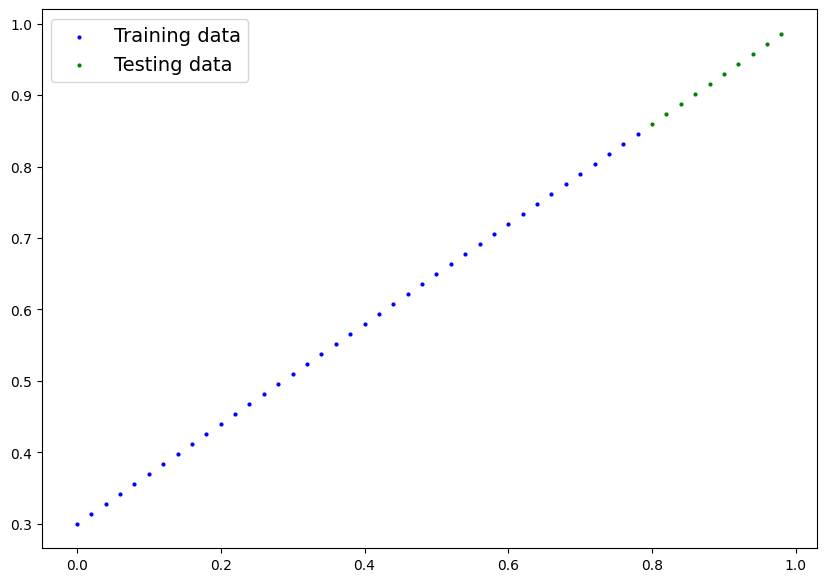

In [7]:
def plot_prediction(train_data=X_train, 
                    train_labels=y_train, 
                    test_data=X_test, 
                    test_labels=y_test, 
                    predictions=None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    # Show the legend
    plt.legend(prop={"size": 14})
    
plot_prediction()

### 2. Build a First Py Torch Model
Our first PyTorch model!

This is very exciting.... let's get started!

Because we're going to be building a classes throughout this course, let's start by building a class for our PyTorch model.

#### What our model will do:
* Start with a random values (weight & bias).
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create our training data).

Through two main algorithms:
* Gradient descent. - https://www.youtube.com/watch?v=IHZwWFHWa-w
* Backpropagation. - https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [8]:
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, #<- start with random weights (this will get adjusted as the model learns)
            requires_grad=True,#<- can we update this value with gradient descent?)
            dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
            requires_grad=True,
            dtype=torch.float))
        print(f"Initial weights: {self.weights.data} , \n Initial bias: {self.bias.data}")
        # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essenntials

* torch.nn - contains all of the building blocks for computational graphs (a neural network is a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside.
So we can check our model parameters or what's inside our model using `.parameters()`.

In [9]:
### Create a random seed
torch.manual_seed(42)

# Create a instance of the model (this is a subclass of nn.Module that contains nn.parameter(s))
model_0 = LinearRegressionModel()
# Check the nn.parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

Initial weights: tensor([0.3367]) , 
 Initial bias: tensor([0.1288])


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
### List named parameters
print(model_0.state_dict())

OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


### Making predictions using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
when we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
# Make Prediction with Model
with torch.inference_mode():
    y_preds = model_0(X_test)
    

# with torch.no_grad(): # no_grad() is a context manager that disables gradient calculation But interface_mode is preferable
#     y_preds = model_0(X_test)
    
print(f"y_preds    : {y_preds} \n")
print(f"y_test     : {y_test} \n")

y_preds    : tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) 

y_test     : tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]]) 



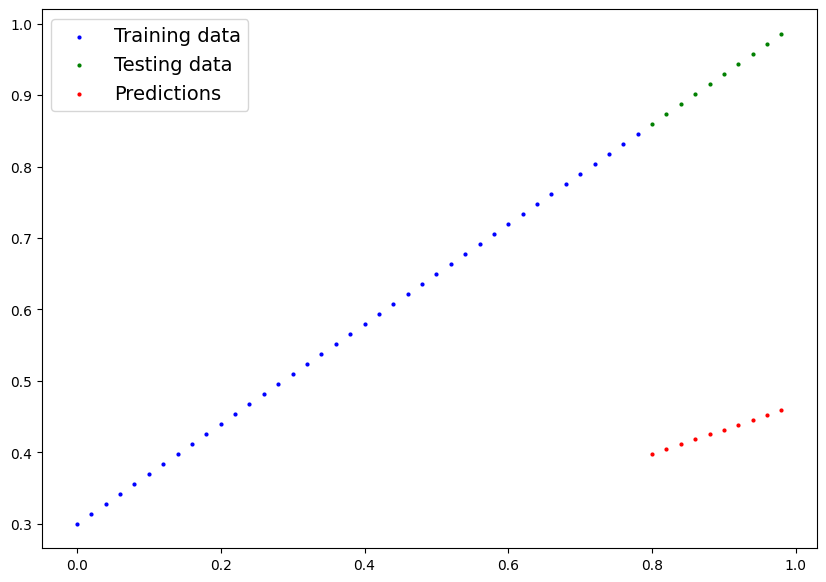

In [12]:
plot_prediction(predictions=y_preds)

## 3. Train your model
the  whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

ony way to measure how good or bad a model's predictions are is to use a loss function.

* Note : loss function may also be called cost function or criterion in different areas. For our case we'll refer to it as loss function.

Things we need to train/fit a model:

*   **Loss function** - A function to measure how *wrong* your model's predictions are to the ideal outputs, lower is better.

*   **Optimizer** - Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And Specifically for PyTorch, we need:
*   **Training loop** - A series of steps (iterations) for our model to go through to improve its predictions each time.
*   **Testing loop** - A series of steps for our model to go through to test its predictions each time.

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
## Setup a loss function
loss_fn = nn.L1Loss()
print(f"loss_fn: {loss_fn}")

## Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 #learning rate = possibly the most important hyperparameter
                            )
print(f"optimizer: {optimizer}")
print(model_0.state_dict())

loss_fn: L1Loss()
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


### Building a traing loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through data
1. forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss.backward() - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. optimizer.step() - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [16]:
# An epoch is one loop through the data
epochs = 169
# epochs = 1000
#Track diffrent values
epoch_count=[]
loss_list=[]
test_loss_list=[]

# 0. Loop through data
for epoch in range(epochs):
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_preds = model_0(X_train)
    
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_preds, y_train)
    
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    print(f"Epoch: {epoch} | Loss: {loss}")
    print(model_0.state_dict(),"\n\n")
    
    ### Test the model
    model_0.eval() # eval mode in pytorch sets all parameters that require gradients to not require gradients
    with torch.inference_mode(): # turns off gradient tracking & uses much less memory
        # 1. Forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)
        
        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            test_loss_list.append(test_loss.detach().numpy())
            loss_list.append(loss.detach().numpy())
            print(f"Epoch: {epoch}|Loss: {loss}| Test loss: {test_loss}")
        

Epoch: 0 | Loss: 0.31288138031959534
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])}) 


Epoch: 0|Loss: 0.31288138031959534| Test loss: 0.48106518387794495
Epoch: 1 | Loss: 0.3013603389263153
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])}) 


Epoch: 2 | Loss: 0.28983935713768005
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])}) 


Epoch: 3 | Loss: 0.2783183455467224
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])}) 


Epoch: 4 | Loss: 0.26679736375808716
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])}) 


Epoch: 5 | Loss: 0.2552763521671295
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])}) 


Epoch: 6 | Loss: 0.24375534057617188
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])}) 


Epoch: 7 | Loss: 0.23223432898521423
OrderedDict({'weights': tensor([0.3679]), 'bias': tensor([0.2088])}) 


Epoch: 8 | Loss: 0.22071333229541779
OrderedDict({'weights': ten

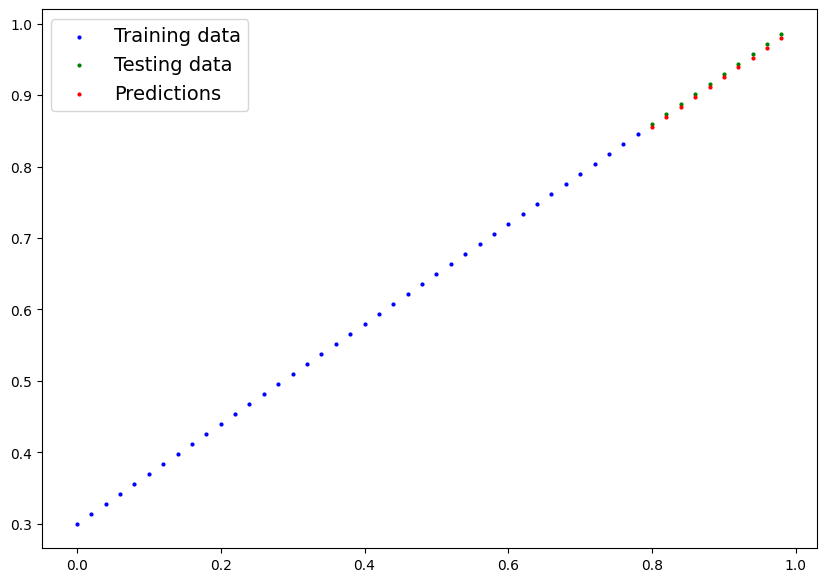

In [17]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


plot_prediction(predictions=y_preds_new)

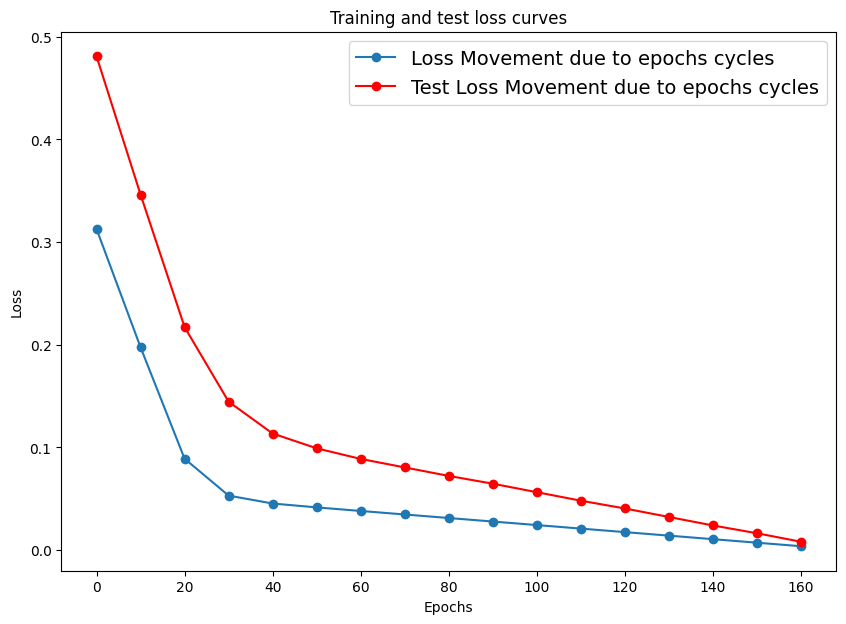

In [18]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.plot(epoch_count,loss_list,'-o', label="Loss Movement due to epochs cycles")
plt.plot(epoch_count,test_loss_list,'-or', label="Test Loss Movement due to epochs cycles")
# Show the legend
plt.legend(prop={"size": 14})
# Label the axes
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and test loss curves")
plt.show()

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch:
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary.

PyTorch's `torch.save()` function allows us to save any kind of Python object to disk.

In [19]:
# Saving our PyTorch mode
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


### Loading a PyTorch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [21]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModel()
# Load the state_dict of our saved model (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))    

Initial weights: tensor([0.2345]) , 
 Initial bias: tensor([0.2303])


<All keys matched successfully>

In [22]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [23]:
# Make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [24]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### **6. Putting All Together**

In [26]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'2.7.0+cpu'

### Create  a device-agnostic code
This means if we have a GPU, we'll use it, but if we don't we'll use the CPU.

In [27]:
### Setup for device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [28]:
### Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3
# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"X[:10]  :   {X[:10]}","\n")
print(f"y[:10]  :   {y[:10]}","\n")
print(f"len(X) :   {len(X)}")
print(f"len(y) :   {len(y)}")
print(f"y = {weight}x + {bias} = {y}")


X[:10]  :   tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 

y[:10]  :   tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 

len(X) :   50
len(y) :   50
y = 0.7x + 0.3 = tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
       

In [29]:
### Split the data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f"train_split: {train_split}")
print(f"x_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"x_test: {len(X_test)}, y_test: {len(y_test)}")

train_split: 40
x_train: 40, y_train: 40
x_test: 10, y_test: 10


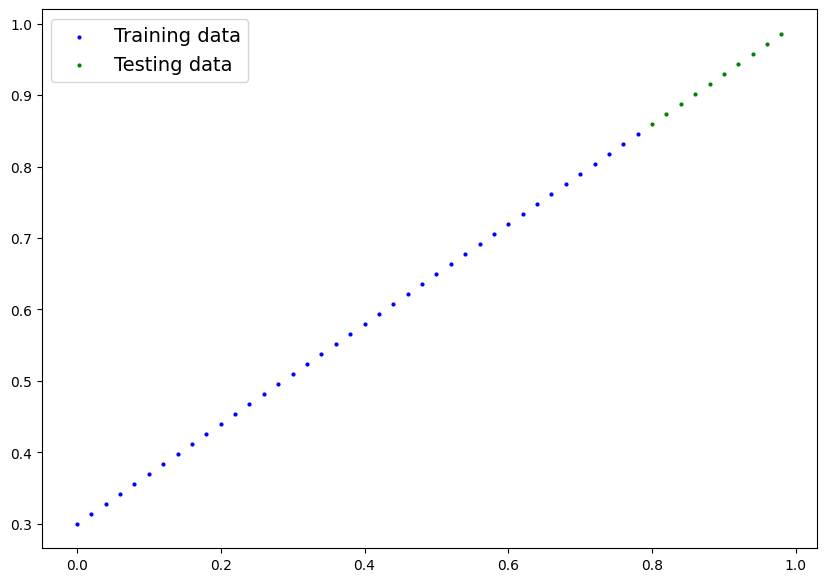

In [30]:
#plot theb data
plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test)

### building the pytorch linear regression model

In [31]:
### building the pytorch linear regression model
### Create a subclass of nn.Module (this is a base class for all neural network modules in PyTorch)
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer or linear layer 
        self.linear_layer = nn.Linear(in_features=1, out_features=1) #<- this is a linear layer (y = mx + b) with 1 input and 1 output feature
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Setup a random seed for reproducibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(f"model1: {model_1}")
print(f"Model_1 state_dict: {model_1.state_dict()}") # check the device of the model parameters

model1: LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model_1 state_dict: OrderedDict({'linear_layer.weight': tensor([[0.7645]]), 'linear_layer.bias': tensor([0.8300])})


In [32]:
### Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [33]:
### Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device # check the device of the model parameters again

device(type='cpu')

### 6.3 Training and Validation Data
For traning we need:
- Loss function
- Optimizer
- Training loop
- Validation loop


In [34]:
# Setup a loss function (L1 loss)
loss_fn = nn.L1Loss()
print(f"loss_fn: {loss_fn}")
# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01) # learning rate = possibly the most important hyperparameter
print(f"optimizer: {optimizer}")

loss_fn: L1Loss()
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [35]:
# Let's train the model
torch.manual_seed(42)

epochs = 100
# Put data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train() # train mode in pytorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_preds = model_1(X_train) #<- move the data to the target device
    
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_preds, y_train) #<- move the data to the target device
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    # print(f"Epoch: {epoch} | Loss: {loss}")
    
    ### Testing
    model_1.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm)
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_1(X_test) #<- move the data to the target device
        # 2. Calculate loss (per batch)
        test_loss = loss_fn(test_pred, y_test) #<- move the data to the target device
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703


### 6.4 Check Out the Model Prediction


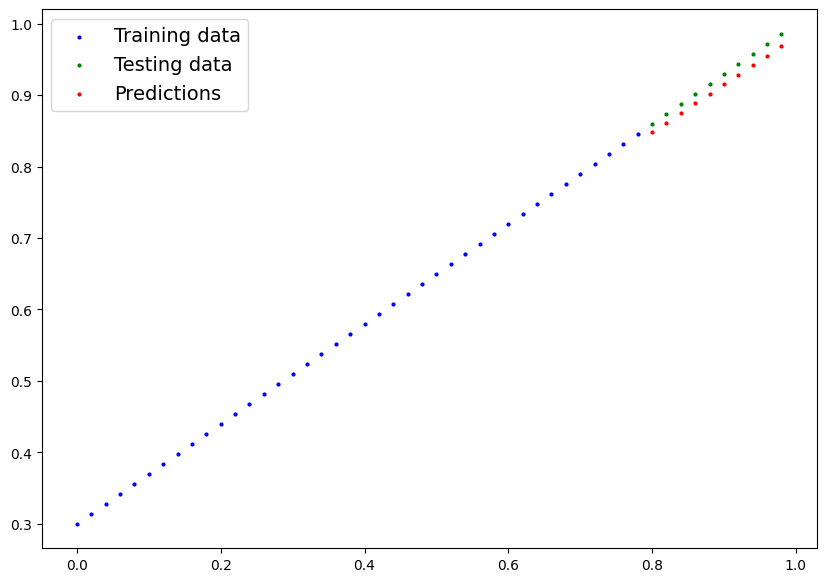

In [36]:
plot_prediction(predictions=test_pred.cpu()) #<- move the data to the CPU for plotting

### 6.5 Save and load the model

In [37]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1_V2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH

Saving model to: models\01_pytorch_workflow_model_1_V2.pth


WindowsPath('models/01_pytorch_workflow_model_1_V2.pth')

In [38]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2() 

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.state_dict() #<- check the loaded model state dict


OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

In [39]:
# Check the loaded model device
next(loaded_model_1.parameters()).device #<- check the device of the loaded model parameters
# Move the loaded model to the target device
loaded_model_1.to(device) #<- move the loaded model to the target device

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [40]:
# Evaluate the loaded model
loaded_model_1.eval() #<- set the model to evaluation mode
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test) #<- move the data to the target device
len(loaded_model_1_preds), len(test_pred) #<- check the length of the predictions
test_pred == loaded_model_1_preds #<- check if the predictions are the same as the original model predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])